In [1]:
!pip install yfinance pandas numpy matplotlib statsmodels prophet tensorflow scikit-learn

  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached prophet-1.1.7-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached multitasking-0.0.12-py3-none-any.whl
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached frozendict-2.4.6-py313-none-any.whl.metadata (23 kB)
  Using cached peewee-3.18.2-py3-none-any.whl
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached curl_cffi-0.12.0-cp39-abi3-win_amd64.whl.metadata (15 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol and the date range
ticker_symbol = 'AAPL'
start_date = '2015-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Download the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv('stock_data.csv')

print(f"Data for {ticker_symbol} from {start_date} to {end_date} has been saved to stock_data.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_6460\2736753366.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data for AAPL from 2015-01-01 to 2025-07-30 has been saved to stock_data.csv


C:\Users\User\AppData\Local\Temp\ipykernel_6460\676699555.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.index = pd.to_datetime(data.index, errors='coerce')  # coerce errors to NaT


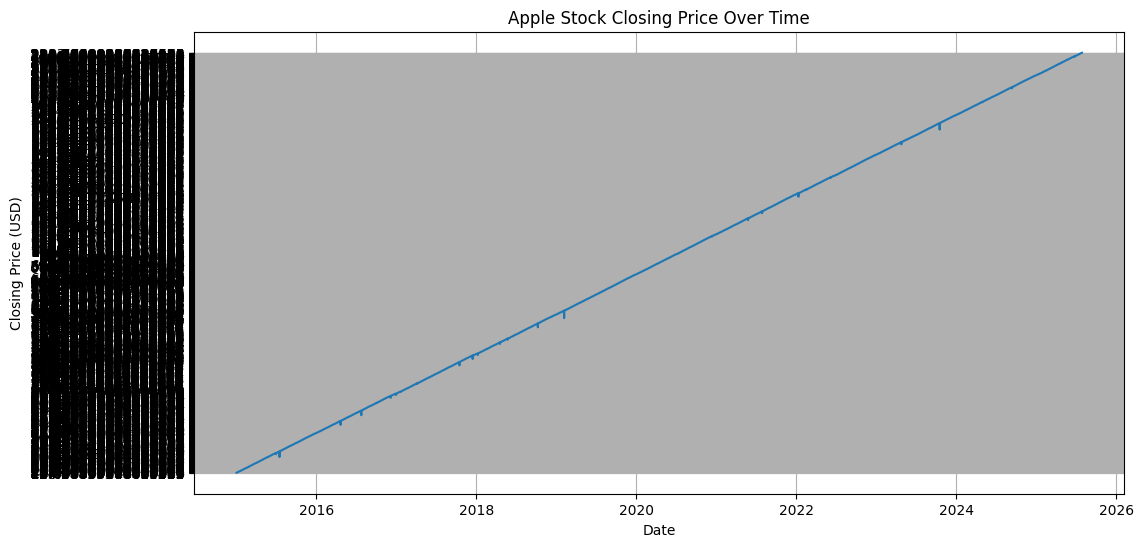

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('stock_data.csv', index_col=0)
data.index = pd.to_datetime(data.index, errors='coerce')  # coerce errors to NaT

# Drop any rows where the index could not be parsed as a date
data = data[~data.index.isna()]

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.title('Apple Stock Closing Price Over Time')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


12:29:07 - cmdstanpy - INFO - Chain [1] start processing
12:29:09 - cmdstanpy - INFO - Chain [1] done processing


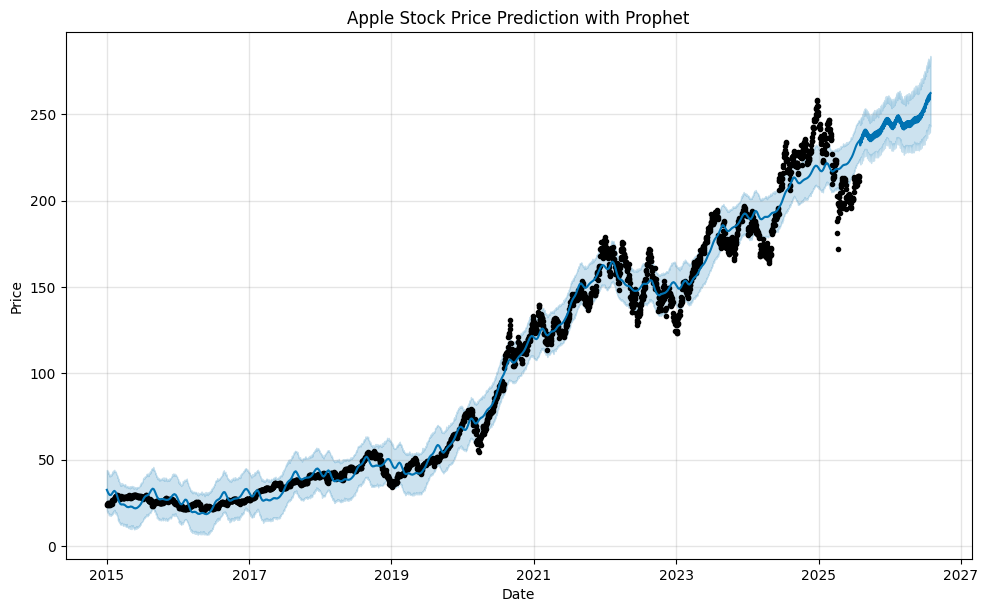

In [10]:
from prophet import Prophet

# Reset index and check column names
df_reset = data.reset_index()
print(df_reset.columns)  # Optional: to check column names

# Use the first column (date) and 'Close'
df_prophet = df_reset.iloc[:, [0, df_reset.columns.get_loc('Close')]].rename(columns={df_reset.columns[0]: 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create a dataframe for future predictions (365 days)
future = model_prophet.make_future_dataframe(periods=365)
forecast_prophet = model_prophet.predict(future)

# Plot the Prophet forecast
model_prophet.plot(forecast_prophet)
plt.title('Apple Stock Price Prediction with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data from the CSV file
# This assumes 'stock_data.csv' is in the same directory as your notebook.
try:
    data = pd.read_csv('stock_data.csv')
    # The CSV has a multi-level header, let's fix it.
    if 'Price' in data.columns[0]:
        data = pd.read_csv('stock_data.csv', header=[1,2])
        data.columns = ['Date', 'Price_Close', 'Price_High', 'Price_Low', 'Price_Open', 'Price_Volume']
        data = data.rename(columns={'Price_Close': 'Close'})
    
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    print("Data loaded and prepared successfully.")
except FileNotFoundError:
    print("Error: 'stock_data.csv' not found. Please make sure the file is in the correct directory.")

c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older t

Data loaded and prepared successfully.


c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\st

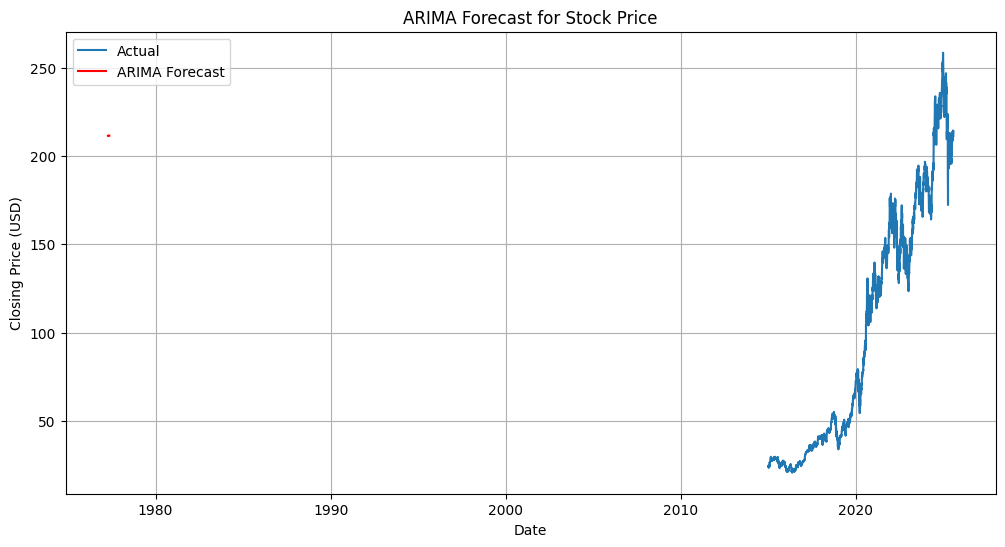

In [13]:
#cell 5
# Fit the ARIMA model on the 'Close' column
# The order (5,1,0) means: 5 past values for autoregression, 1 differencing order, 0 for moving average.
model_arima = ARIMA(data['Close'], order=(5,1,0))
model_fit_arima = model_arima.fit()

# Forecast for the next 30 days
forecast_arima = model_fit_arima.forecast(steps=30)

# Plot the ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\stat

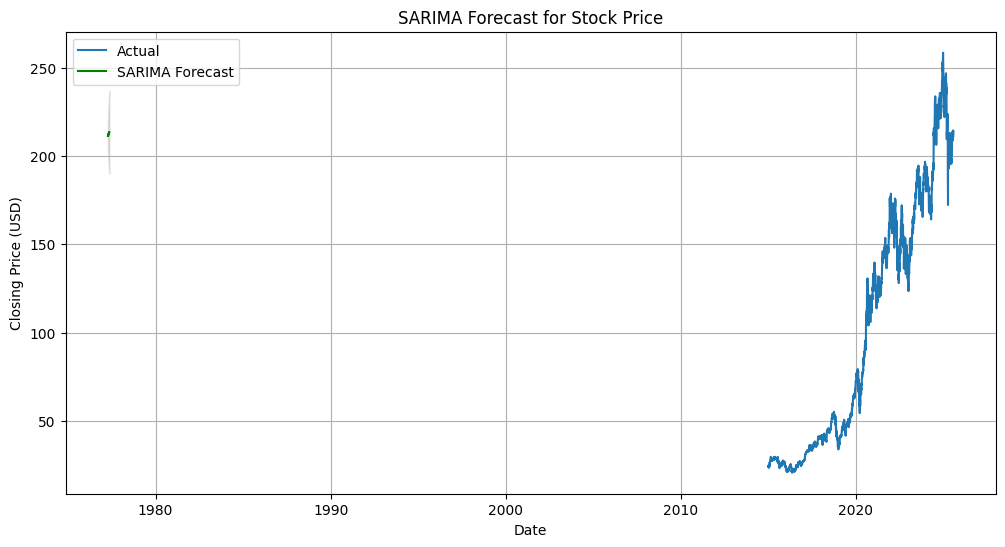

In [14]:
#cell 6
# Fit the SARIMA model
# The seasonal_order (1, 1, 1, 12) captures a yearly seasonality (12 months).
model_sarima = SARIMAX(data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit(disp=False) # disp=False suppresses convergence output

# Get the forecast and confidence intervals for the next 30 days
forecast_sarima_res = model_fit_sarima.get_forecast(steps=30)
forecast_ci = forecast_sarima_res.conf_int()

# Plot the SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual')
forecast_sarima_res.predicted_mean.plot(label='SARIMA Forecast', color='green')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('SARIMA Forecast for Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#cell 7.2
# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']].values)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Function to create sequences of data
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Create the training and test datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input data to be [samples, time steps, features] for the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (2065, 60, 1)
X_test shape: (471, 60, 1)


c:\Users\User\Desktop\Data Science Project\Stock_Market_Forecasting\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0080
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 3.1413e-04
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.8428e-04
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.7981e-04
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 2.5943e-04
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 2.7735e-04
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.5606e-04
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.4391e-04
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 2.4002e-04
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 2.0519e-04
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


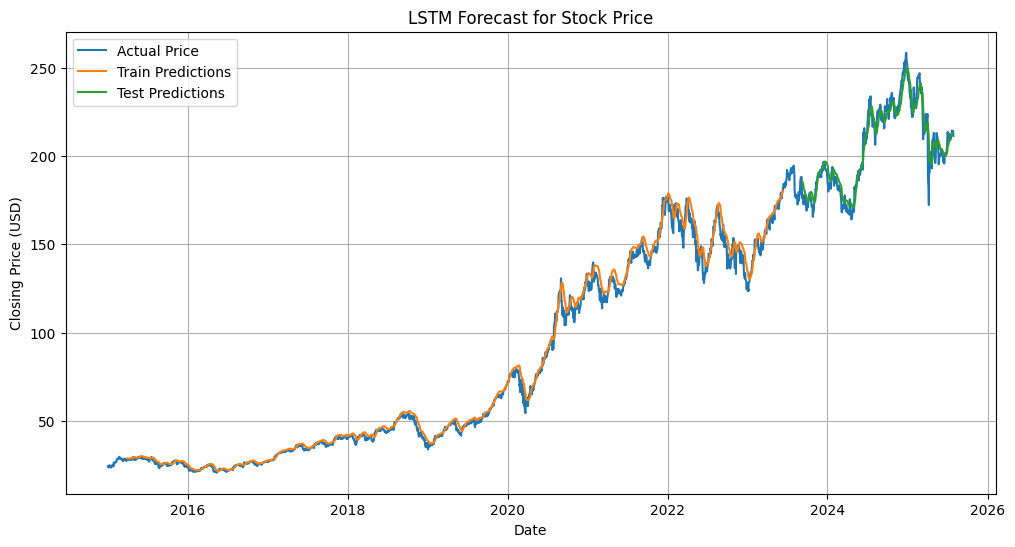

In [19]:
#cell 7.3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define and train the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the training and test data
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)

# Inverse transform the predictions to get the actual price values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Prepare data for plotting the predictions
train_predict_plot = np.full_like(scaled_data, np.nan)
test_predict_plot = np.full_like(scaled_data, np.nan)

# Place train predictions
train_predict_plot[time_step:time_step+len(train_predict), :] = train_predict

# Place test predictions
test_start = len(train_predict) + (time_step * 2)
test_predict_plot[test_start:test_start+len(test_predict), :] = test_predict

# Plot the LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(data.index, train_predict_plot, label='Train Predictions')
plt.plot(data.index, test_predict_plot, label='Test Predictions')
plt.title('LSTM Forecast for Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()